In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/3курс/tms/Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


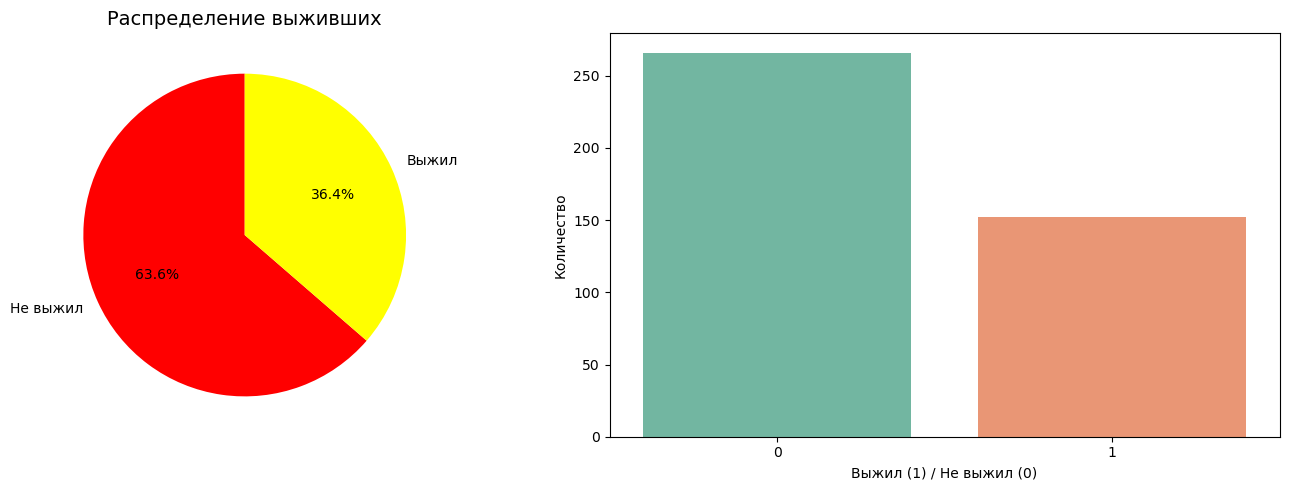

Всего пассажиров: 418
Выжило: 152
Погибло: 266


In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

survived_counts = df['Survived'].value_counts()
axes[0].pie(survived_counts, labels=['Не выжил', 'Выжил'], autopct='%1.1f%%', 
            colors=['red', 'yellow'], startangle=90)
axes[0].set_title('Распределение выживших', fontsize=14)

sns.countplot(x='Survived', data=df, ax=axes[1], palette='Set2')
axes[1].set_xlabel('Выжил (1) / Не выжил (0)')
axes[1].set_ylabel('Количество')

plt.tight_layout()
plt.show()

print(f"Всего пассажиров: {len(df)}")
print(f"Выжило: {df['Survived'].sum()}")
print(f"Погибло: {len(df) - df['Survived'].sum()}")

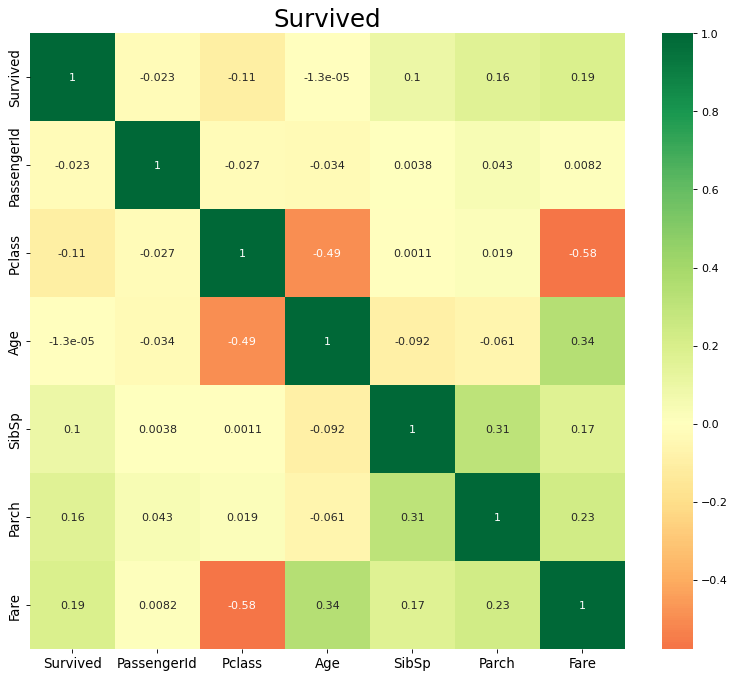

In [24]:
heatdf = df[['Survived', 'PassengerId','Pclass', 'Age','SibSp','Parch','Fare']]

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(heatdf.corr(), xticklabels=heatdf.corr().columns, yticklabels=heatdf.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Survived', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

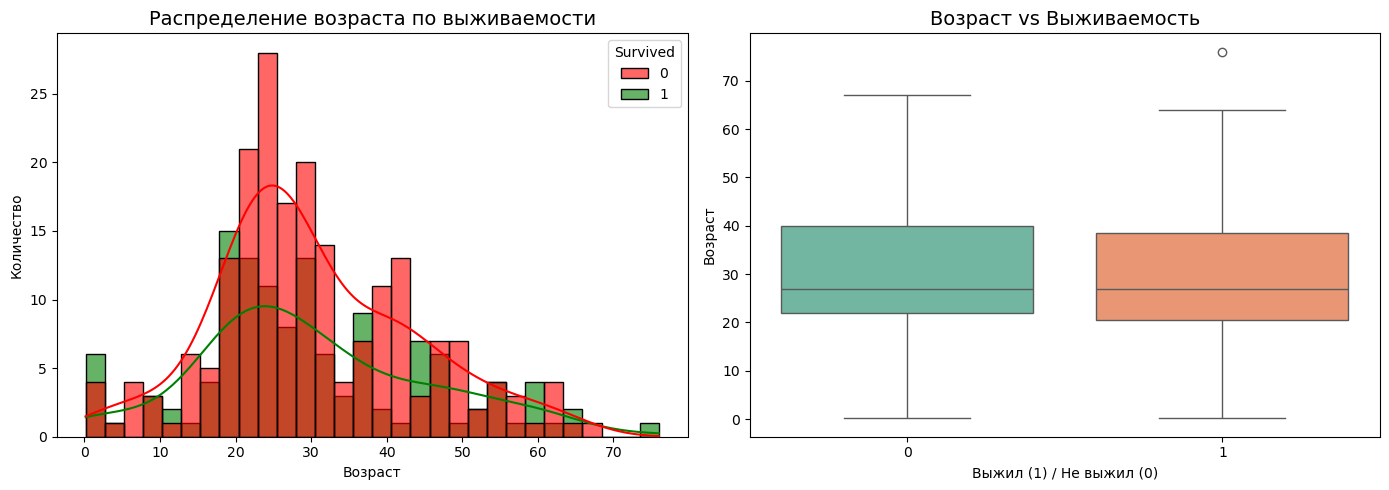


Статистики по возрасту:
Средний возраст: 30.3 лет
Медианный возраст: 27.0 лет
Минимальный возраст: 0.2 лет
Максимальный возраст: 76.0 лет
Количество пропусков в возрасте: 86 (20.6%)


In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, 
             palette={0: 'red', 1: 'green'}, alpha=0.6, ax=axes[0])
axes[0].set_title('Распределение возраста по выживаемости', fontsize=14)
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество')

# Boxplot
sns.boxplot(x='Survived', y='Age', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Возраст vs Выживаемость', fontsize=14)
axes[1].set_xlabel('Выжил (1) / Не выжил (0)')
axes[1].set_ylabel('Возраст')

plt.tight_layout()
plt.show()

# Статистики по возрасту
print("\nСтатистики по возрасту:")
print(f"Средний возраст: {df['Age'].mean():.1f} лет")
print(f"Медианный возраст: {df['Age'].median():.1f} лет")
print(f"Минимальный возраст: {df['Age'].min():.1f} лет")
print(f"Максимальный возраст: {df['Age'].max():.1f} лет")
print(f"Количество пропусков в возрасте: {df['Age'].isnull().sum()} ({df['Age'].isnull().mean()*100:.1f}%)")


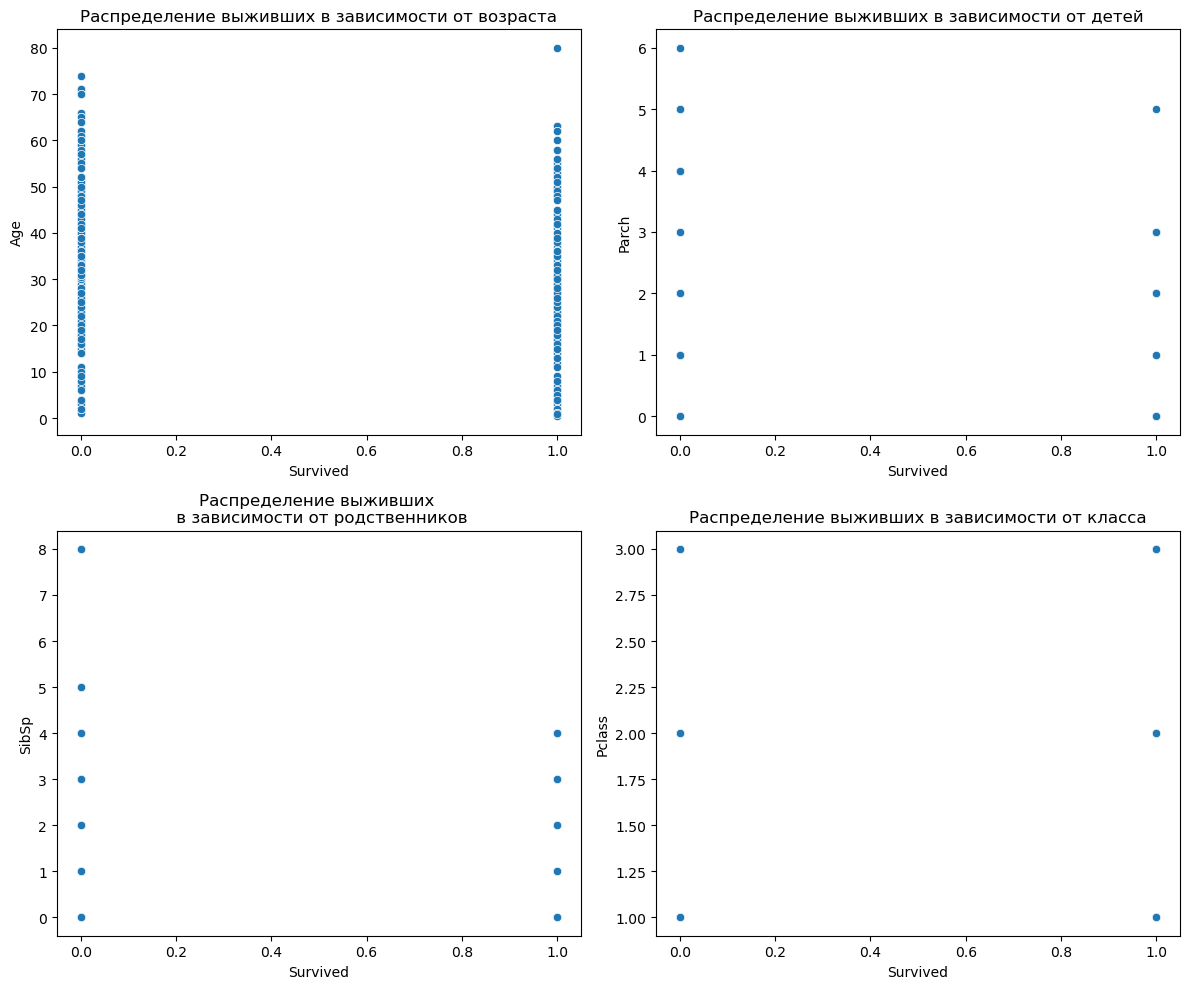

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=df, x="Survived", y = "Age", ax=axes[0,0])
axes[0,0].set_title("Распределение выживших в зависимости от возраста")
sns.scatterplot(data=df, x="Survived", y = "Parch", ax=axes[0,1])
axes[0,1].set_title("Распределение выживших в зависимости от детей")
sns.scatterplot(data=df, x="Survived", y = "SibSp", ax=axes[1,0])
axes[1,0].set_title("Распределение выживших \n в зависимости от родственников")
sns.scatterplot(data=df, x="Survived", y = "Pclass", ax=axes[1,1])
axes[1,1].set_title("Распределение выживших в зависимости от класса")
plt.tight_layout()
plt.show()

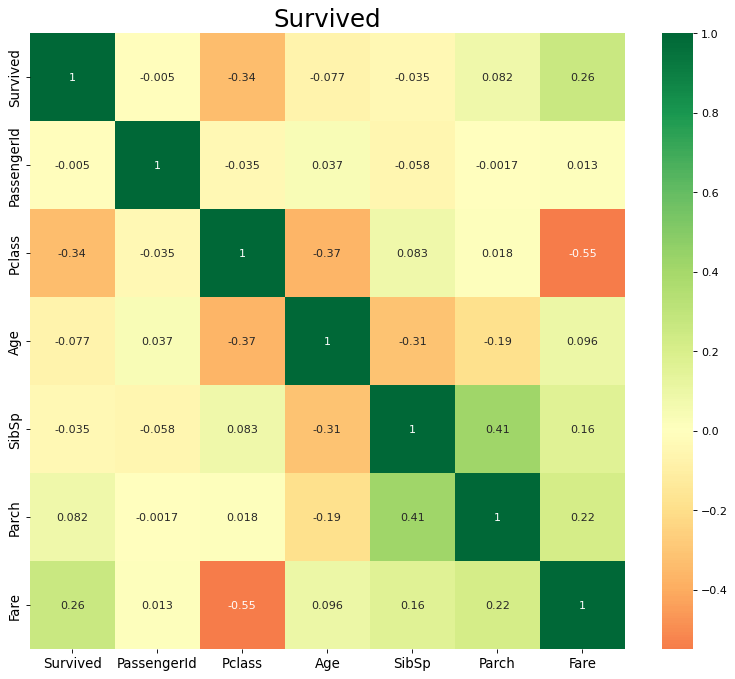

In [8]:
heatdf = df[['Survived', 'PassengerId','Pclass', 'Age','SibSp','Parch','Fare']]

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(heatdf.corr(), xticklabels=heatdf.corr().columns, yticklabels=heatdf.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Survived', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [15]:
data = df["Sex"] 
if male in df:
    male == 0 and female == 1

NameError: name 'male' is not defined

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


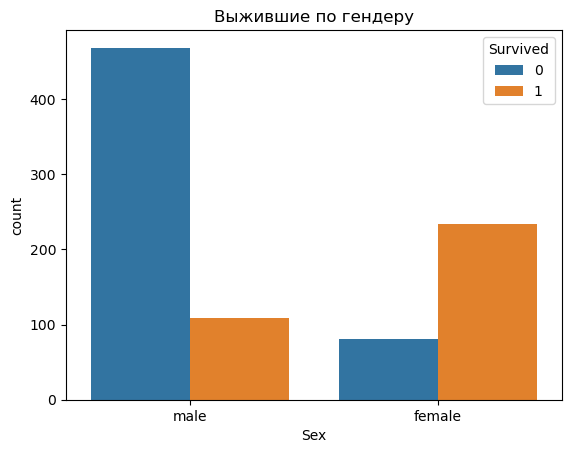

In [16]:
plt.figure()
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Выжившие по гендеру')
plt.show()